In [1]:
import networkx as nx
import json

In [2]:
# transforming a graph into a transportation network if it is not already a network
def make_transport_network(transportation_network, num_nodes):
    for node in transportation_network.nodes():
        if transportation_network.in_degree(node) == 0:
            transportation_network.add_edge('101', node)
        if transportation_network.out_degree(node) == 0:
            transportation_network.add_edge(node, str(num_nodes))
        if transportation_network.has_edge(node, node):
            transportation_network.remove_edge(node, node)   
    edges = []

    for edge in transportation_network.edges.data():
        node1 = edge[0]
        node2 = edge[1]
        edges.append({'node1' : node1, 'node2' : node2, 'weight' : 1})
    return edges

In [3]:
def write_to_file(num_nodes, edges, density):
    dictionary = {
        "background": 7,
        "direction": "directed",
        "edgeColor": 8,
        "edges" : edges ,
        "hasEdges": True,
        "nodeColor": 1
    }

    file_name = "Nodes" + str(num_nodes) + "Density" + str(density) + ".json"
    with open(file_name, "w") as f:
        json.dump(dictionary, f)

In [4]:
import matplotlib.pyplot as plt
import random

def generate_transportation_network(num_nodes, treshold):
    # Generate random coordinates for nodes
    coordinates = [(random.uniform(0, 20), random.uniform(0, 20)) for _ in range(num_nodes)]
    
    # Create an empty directed graph
    G = nx.DiGraph()
    
    # Add nodes to the graph
    for i, (x, y) in enumerate(coordinates):
        G.add_node(i, pos=(x, y))
    
    # Add edges to the graph (connecting nearby nodes)
    for i in range(num_nodes):
        for j in range(num_nodes):
            distance = ((coordinates[i][0] - coordinates[j][0]) ** 2 + (coordinates[i][1] - coordinates[j][1]) ** 2) ** 0.5
            
            if distance < treshold and i !=j:  
                G.add_edge(i, j)
    
    return G

In [5]:
def draw_graph(transportation_network):
    pos = nx.get_node_attributes(transportation_network, 'pos')
    nx.draw(transportation_network, pos, with_labels=True, node_size=300, node_color='lightblue', font_size=12, font_weight='bold')
    plt.show()

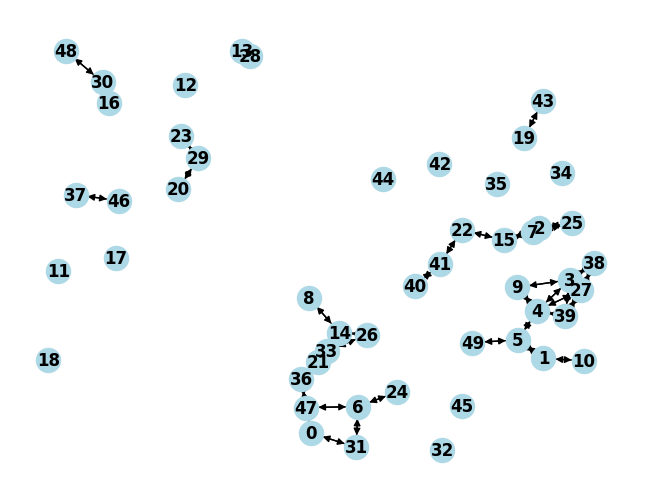

0.03996983408748114


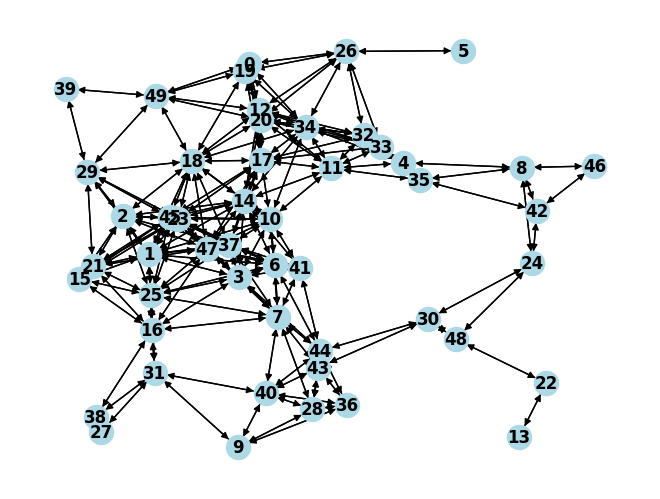

0.15874811463046756


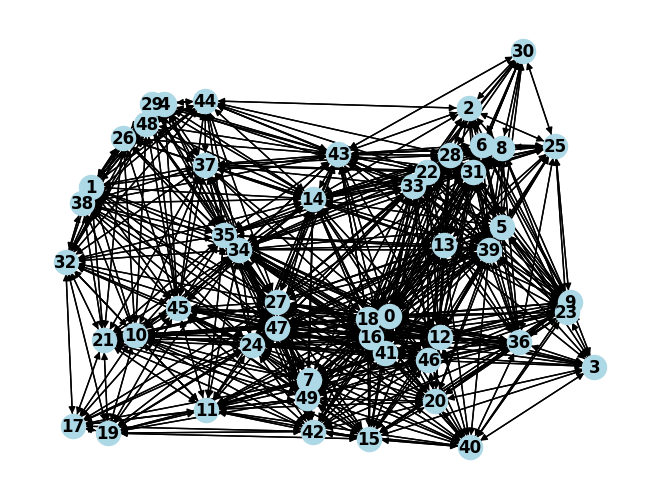

0.47171945701357465


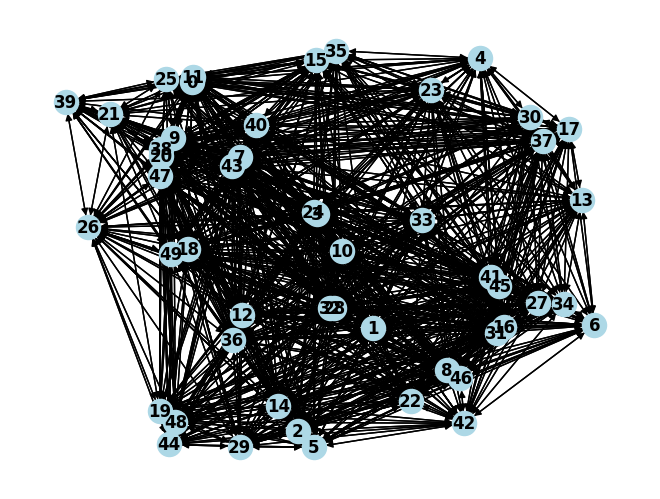

0.7356711915535445


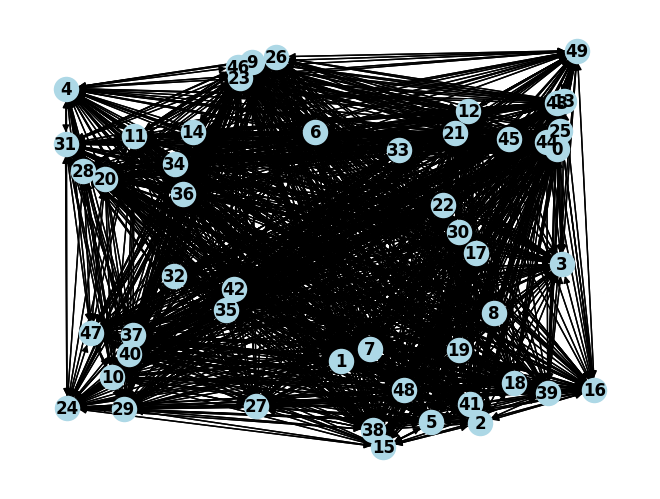

0.9234539969834088


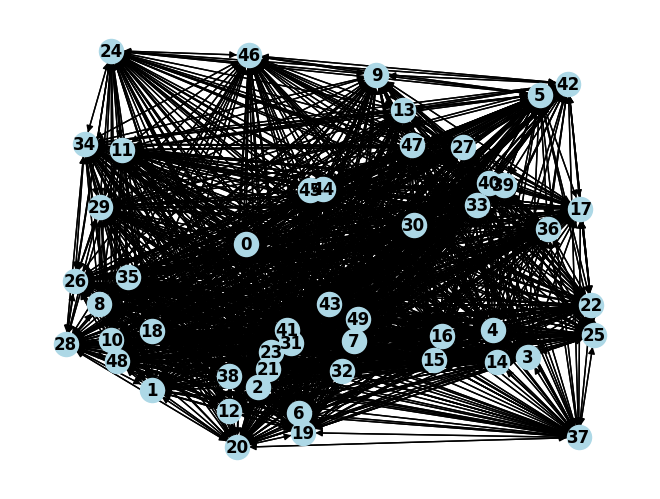

0.9242081447963801


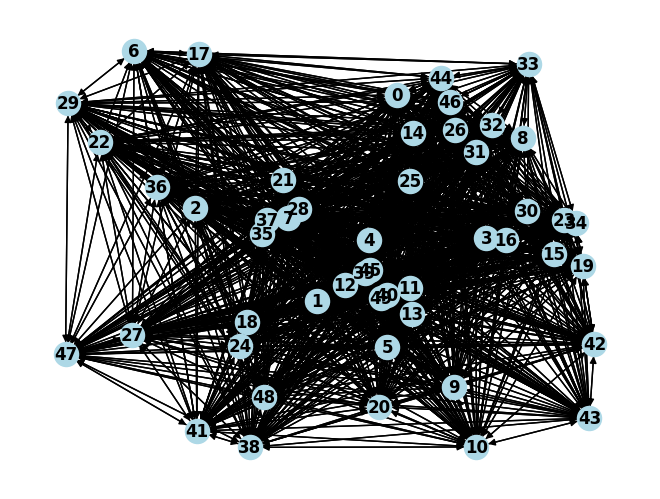

0.9242081447963801


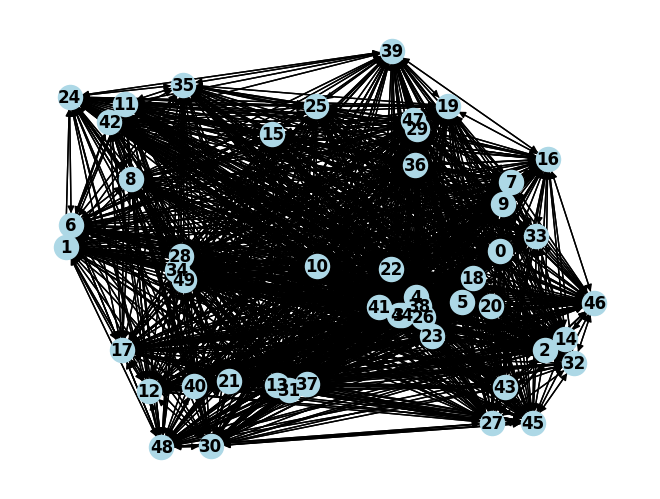

0.9242081447963801


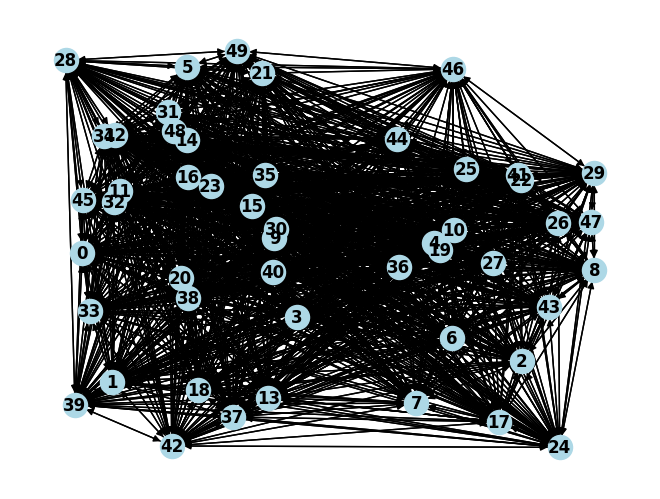

0.9242081447963801


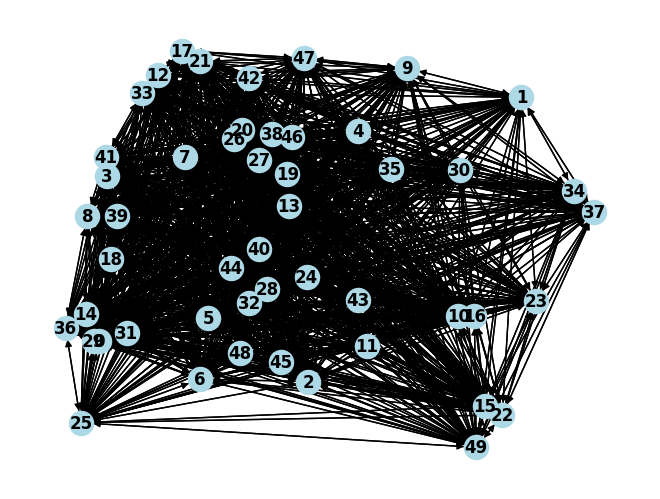

0.9242081447963801


In [6]:
distances = [2, 5, 10, 15, 25, 50, 100, 300]
num_nodes = 50

for distance in distances:
    transportation_network = generate_transportation_network(num_nodes, distance)

    draw_graph(transportation_network)

    transportation_network.add_node("101")
    transportation_network.add_node(str(num_nodes))
    edges = make_transport_network(transportation_network, num_nodes)
    write_to_file(num_nodes, edges, nx.density(transportation_network))
    print(nx.density(transportation_network))

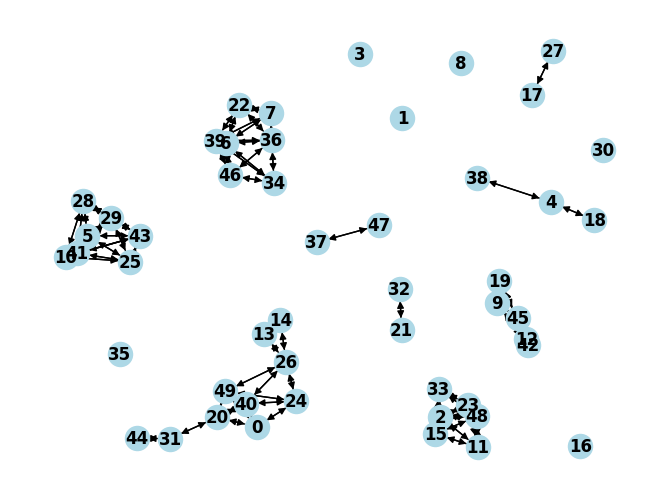

0.06636500754147813


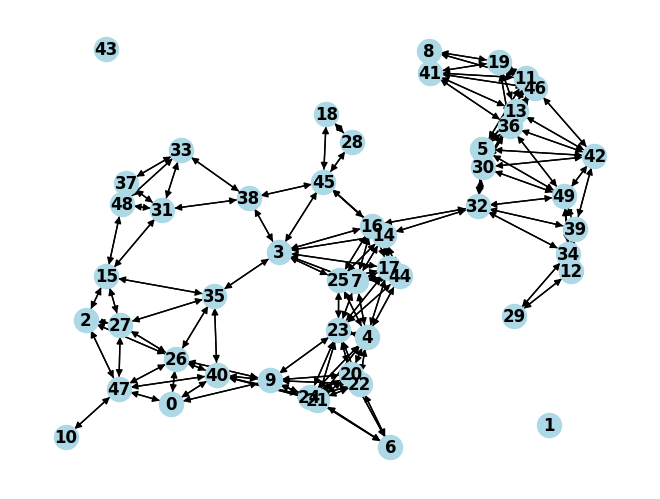

0.11010558069381599


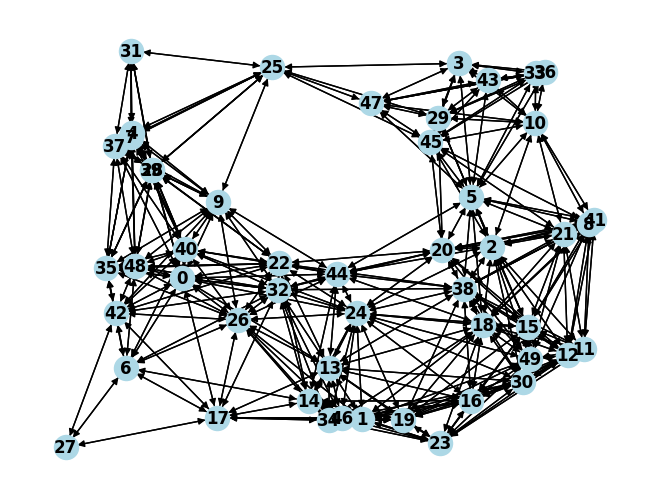

0.24698340874811464


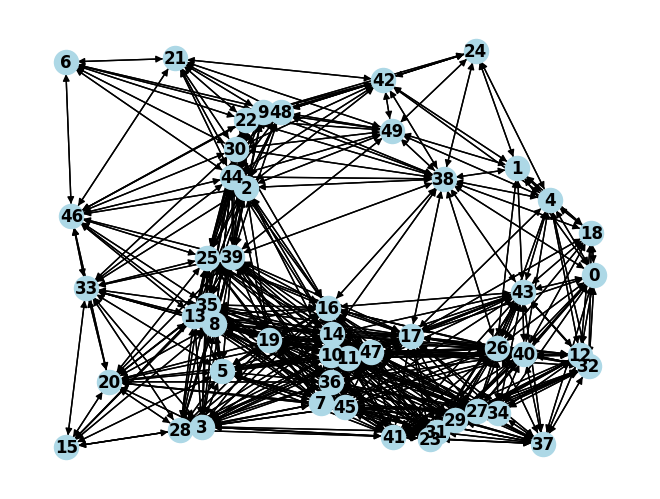

0.3782051282051282


In [6]:
distances = [3, 4, 7, 9]
num_nodes = 50

for distance in distances:
    transportation_network = generate_transportation_network(num_nodes, distance)

    draw_graph(transportation_network)

    transportation_network.add_node("101")
    transportation_network.add_node(str(num_nodes))
    edges = make_transport_network(transportation_network, num_nodes)
    write_to_file(num_nodes, edges, nx.density(transportation_network))
    print(nx.density(transportation_network))